In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

loadin the data

In [2]:
df = pd.read_csv(r"C:\Users\KIIT\Downloads\NFLX.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


get the number of trading days

In [3]:
df.shape

(1009, 7)

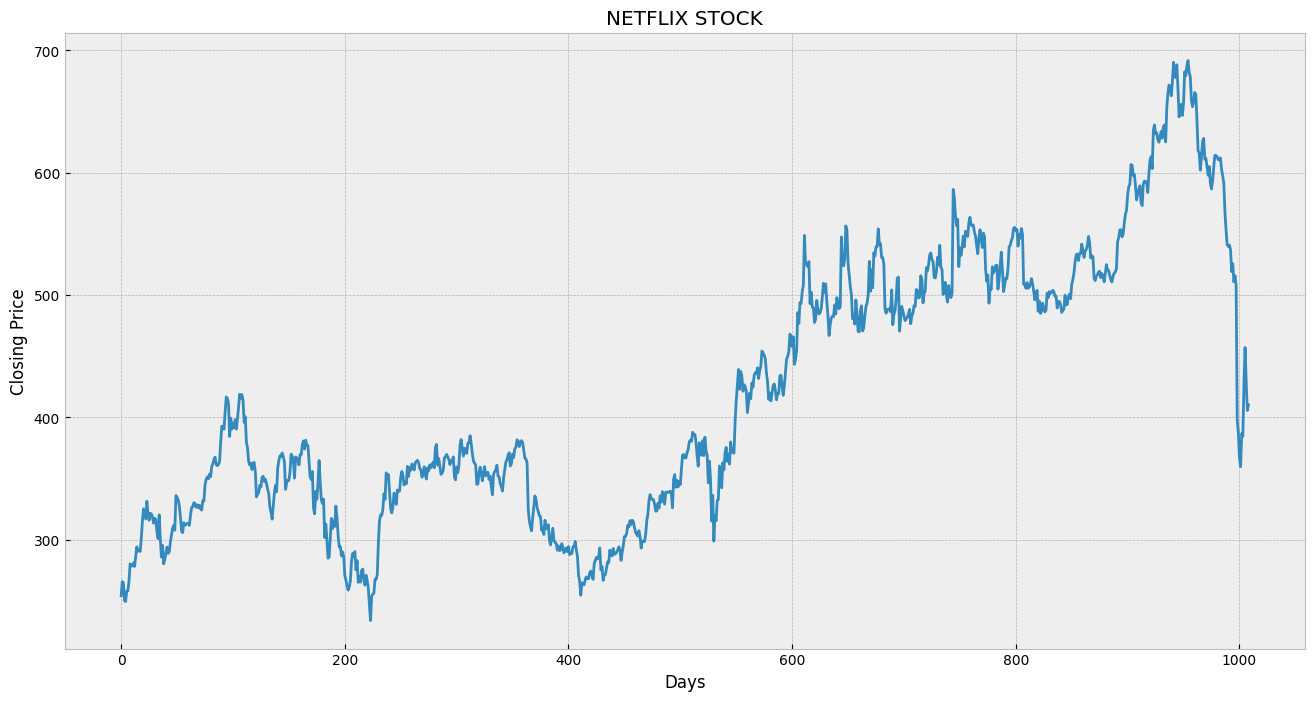

In [4]:
#VISUALISE THE CLOSING PRICE
plt.figure(figsize=(16,8))
plt.title('NETFLIX STOCK')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df['Close'])
plt.show() 

In [5]:
#GET THE CLOSE PRICE DATA ONLY
df = df[['Close']]
df.head(5)

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [6]:
#CREATE A VARIABLE TO PREDICT X DAYS OUT IN THE FUTURE
futureDays = 25

#CREATE A NEW COLUMN TARGET SHIFTED X UNITS/DAYS UP
df['Prediction'] = df[['Close']].shift(-futureDays)
df.head(5)

,Close,Prediction
0,254.259995,315.880005
1,265.720001,321.549988
2,264.559998,321.089996
3,250.100006,318.450012
4,249.470001,313.480011


In [7]:
df.tail(4)

,Close,Prediction
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


In [8]:
#CREATE A FEATURE DATASET (X) AND CONVERT IT TO A NUMPY ARRAYAND REMOVE THE LAST x DAYS
X = np.array(df.drop(['Prediction'],1))[:-futureDays]
print(X)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6668\785269548.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))[:-futureDays]


In [9]:
#CREATE A TARGET DATA SET AND CONVERT IT TO NUMPY ARRAY AND GET ALL THE DATA EXCEPT FOR x DAYS
Y = np.array(df['Prediction'])[:-futureDays]
print(Y)

[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


In [10]:
#TRAINING THE DATA AND TESTING IT WITH 80% TRAINING AND 20% TESTING
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25)

In [11]:
#CREATE A DECISION TREE REGRESSOR MODEL
trm = DecisionTreeRegressor()
trm.fit(train_x, train_y)

DecisionTreeRegressor()

In [12]:
#CREATE A LINEAR REGRESSION MODEL
lrm = LinearRegression()
lrm.fit(train_x,train_y)

LinearRegression()

In [13]:
#GET THE LAST ROWS DATA AND STORE IT IN A NUMPY ARRAY
future_x = df.drop(['Prediction'], 1)[:-futureDays]
future_x = future_x.tail(futureDays)
future_x = np.array(future_x)
future_x

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6668\3903858410.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  future_x = df.drop(['Prediction'], 1)[:-futureDays]


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [14]:
#SHOW THE DECISIONTREEREGRESSOR MODEL PREDICTION
trm_prediction = trm.predict(future_x)
print(trm_prediction)
print()

[602.440002 663.840027 591.150024 567.52002  384.359985 384.359985
 539.849976 540.840027 537.219971 678.799988 429.480011 510.799988
 515.859985 508.25     397.5      387.149994 366.420013 359.700012
 397.5      384.359985 384.359985 457.130005 429.480011 405.600006
 510.799988]



In [15]:
#SHOW THE PREDICTION OF THE LINEARREGRESSION MODEL
lrm_prediction = lrm.predict(future_x)
print(lrm_prediction)
print()

[639.43394021 646.02165045 644.40835253 624.74390969 603.11660707
 601.95139578 589.09873383 598.56347535 610.11657145 612.35727794
 597.04875597 597.64027829 591.27669426 585.38811044 591.70689198
 579.17687922 575.29595945 581.57890941 591.59934255 599.95270262
 599.81829339 598.94887059 596.78885374 596.63644626 598.0257282 ]



C:\Users\KIIT\AppData\Local\Temp\ipykernel_6668\329387618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


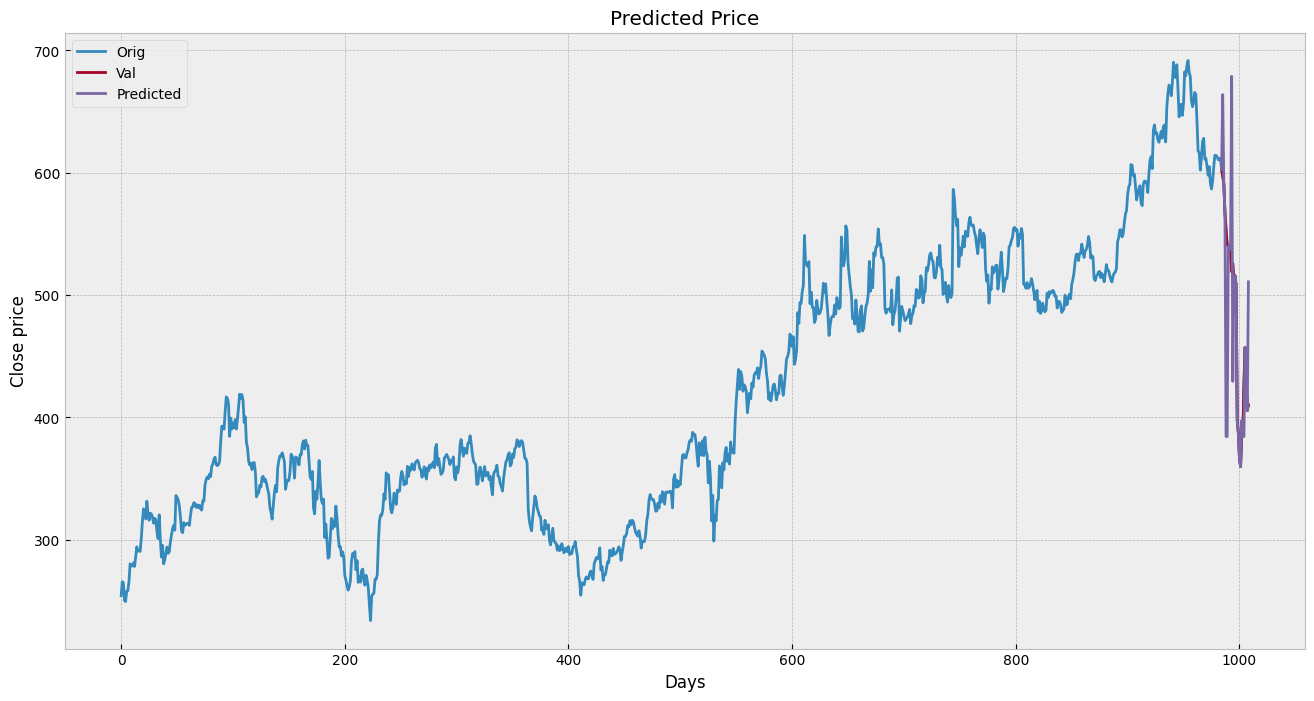

In [16]:
#VISUALISE THE DATA 
predictions = trm_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Predicted Price')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Predicted'])
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6668\42601227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


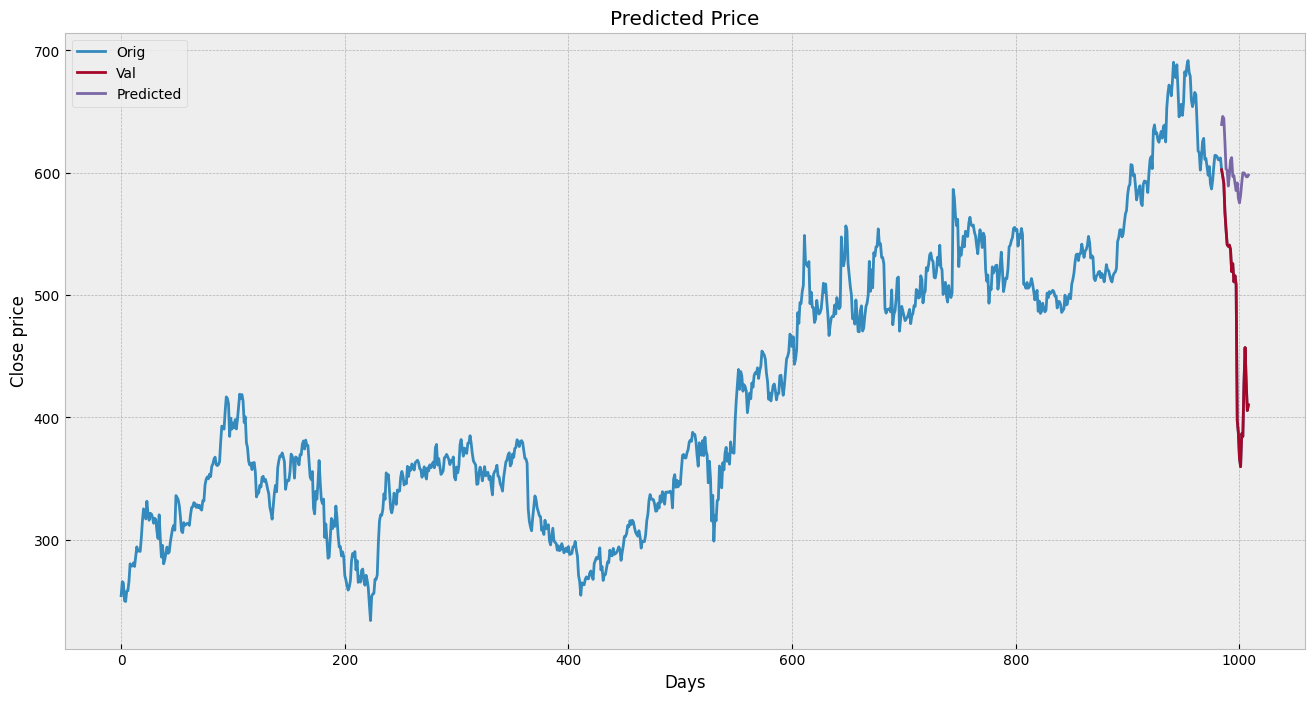

In [17]:
#FOR LINEAR MODEL

predictions = lrm_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Predicted Price')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Predicted'])
plt.show()

In [18]:
#CALCULATING THE ACCURACY OF THE MODEL
rmse = np.sqrt(np.mean(((future_x - test_y) ** 2)))
rmse

232.12629471809

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("the PEARSON COEFFICIENT of the model is: ",lrm.coef_)

the mse of the model is:  [0.8962826]


AttributeError: 'numpy.ndarray' object has no attribute 'coef_'